# Binary Classififcation Using Random Forest Classifier
## Objective - To Accurately predict the Target =1 using Random Forest Classifier
#### Target  variable= 'target'
#### Classes  = 0 & 1
#### 0 = customer not likely to buy a new car
#### 1 = customer likely to buy a new car 

###### Data Dictionary:
ID: Unique ID of the customer
target: Model target. 1 if the customer has purchased more than 1 vehicle, 0 if they have only purchased 1.
age_band: Age banded into categories
gender: Male, Female or Missing
car_model: The model of vehicle, 18 models in total
car_segment: The type of vehicle
age_of_vehicle_years: Age of their last vehicle, in deciles
sched_serv_warr: Number of scheduled services (e.g. regular check-ups) used under warranty, in deciles
non_sched_serv_warr: Number of non-scheduled services (e.g. something broke out of the service cycle) used under warranty, in deciles
sched_serv_paid: Amount paid for scheduled services, in deciles
non_sched_serv_paid: Amount paid for non scheduled services, in deciles
total_paid_services: Amount paid in total for services, in deciles
total_services: Total number of services, in deciles
mth_since_last_serv: The number of months since the last service, in deciles
annualised_mileage: Annualised vehicle mileage, in deciles
num_dealers_visited: Number of different dealers visited for servicing, in deciles
num_serv_dealer_purchased: Number of services had at the same dealer where the vehicle was purchased, in deciles
### Project Steps:
##### 1. Loading and exploring data
##### 2. Preparing and cleaning data
##### 3. Splitting the data in Train (60%), Validation (20%) and Test (20%) sets
##### 4. Fitting the Random Forest Classifier
##### 5. Assess Baseline Performance
##### 6. Assess the performance metrics on Validation and Test sets

### 1. Loading and Exploring the data

In [63]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.metrics import roc_auc_score, classification_report

In [2]:
data = pd.read_csv('/Users/varunsinghchhetri/Downloads/repurchase_training.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
df.shape

(131337, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [7]:
df.isnull().sum()

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

### Preparing and cleaning the data

In [8]:
df['Target'].value_counts()

0    127816
1      3521
Name: Target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

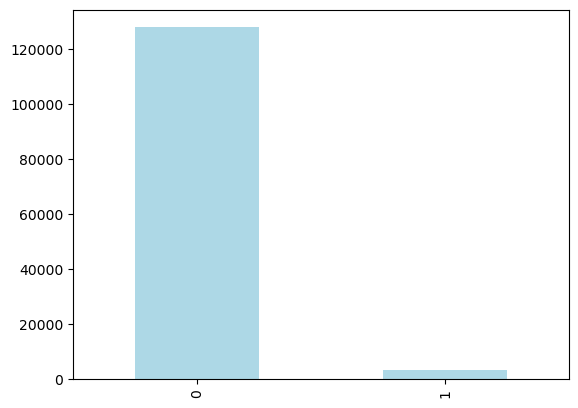

In [64]:
df['Target'].value_counts().plot(kind='bar', color='LightBlue')
plt.show

In [10]:
# Check for duplicates
duplicates = df.duplicated()

# Print number of duplicates
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


In [11]:
df_copy = df.drop(['ID', 'age_band'], axis=1)

In [12]:
# Checking for missing values
df_copy.isnull().sum()

Target                           0
gender                       69308
car_model                        0
car_segment                      0
age_of_vehicle_years             0
sched_serv_warr                  0
non_sched_serv_warr              0
sched_serv_paid                  0
non_sched_serv_paid              0
total_paid_services              0
total_services                   0
mth_since_last_serv              0
annualised_mileage               0
num_dealers_visited              0
num_serv_dealer_purchased        0
dtype: int64

In [13]:
df_copy['gender'].value_counts()

Male      36072
Female    25957
Name: gender, dtype: int64

In [14]:
# Replace missing values in a specific column with 'unknown'
df_copy['gender'] = df_copy['gender'].fillna('unknown')

In [15]:
df_copy.isnull().sum()

Target                       0
gender                       0
car_model                    0
car_segment                  0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

In [16]:
df_copy[['gender','car_model','car_segment']]

,gender,car_model,car_segment
0,Male,model_1,LCV
1,unknown,model_2,Small/Medium
2,Male,model_3,Large/SUV
3,unknown,model_3,Large/SUV
4,Female,model_2,Small/Medium
...,...,...,...
131332,unknown,model_3,Large/SUV
131333,unknown,model_3,Large/SUV
131334,unknown,model_5,Large/SUV
131335,unknown,model_5,Large/SUV


In [17]:
# Performing One Hot Encoding
df_copy = pd.get_dummies(df_copy, columns=['gender','car_model', 'car_segment'])

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Target                     131337 non-null  int64
 1   age_of_vehicle_years       131337 non-null  int64
 2   sched_serv_warr            131337 non-null  int64
 3   non_sched_serv_warr        131337 non-null  int64
 4   sched_serv_paid            131337 non-null  int64
 5   non_sched_serv_paid        131337 non-null  int64
 6   total_paid_services        131337 non-null  int64
 7   total_services             131337 non-null  int64
 8   mth_since_last_serv        131337 non-null  int64
 9   annualised_mileage         131337 non-null  int64
 10  num_dealers_visited        131337 non-null  int64
 11  num_serv_dealer_purchased  131337 non-null  int64
 12  gender_Female              131337 non-null  uint8
 13  gender_Male                131337 non-null  uint8
 14  gend

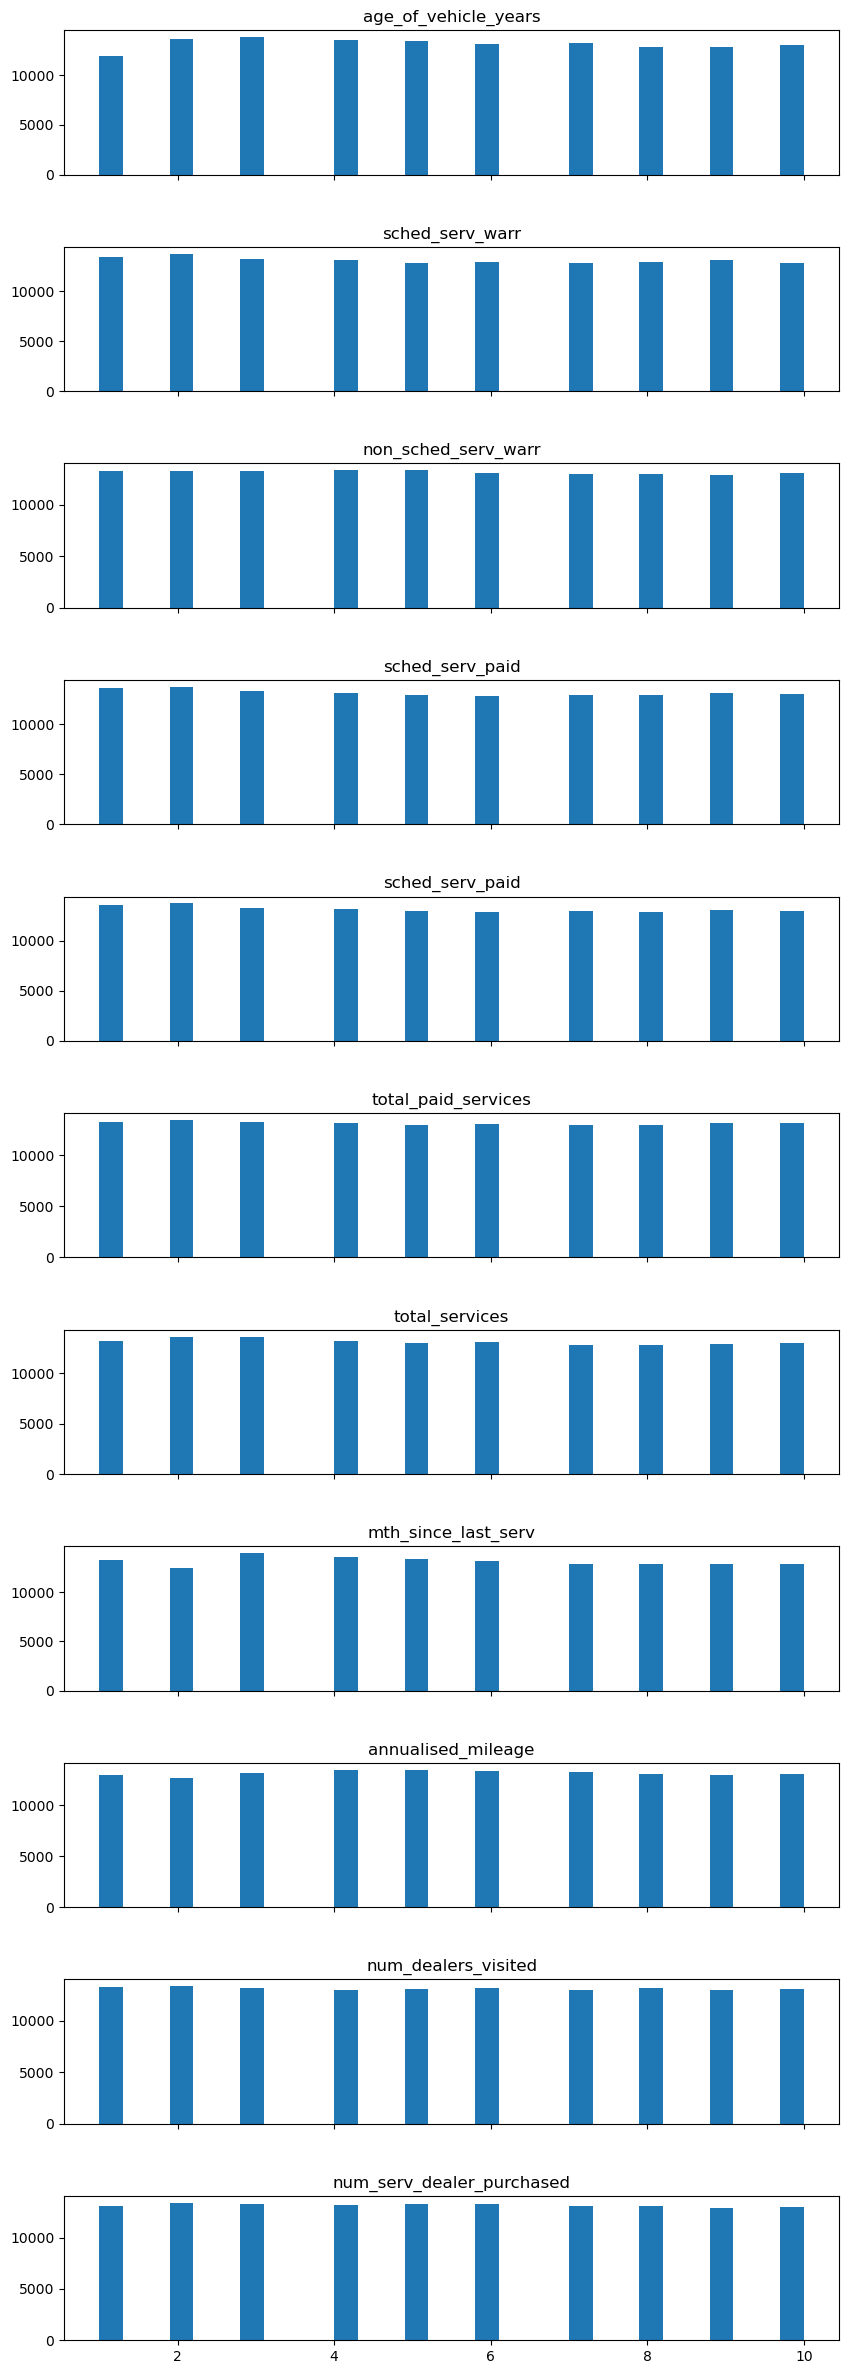

In [65]:
# Plotting histogram to check the distribution of columns

cols_to_check = ['age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'sched_serv_paid', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased']

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(cols_to_check), figsize=(10, 30), sharex=True)

# Plot histograms for each column
for i, col in enumerate(cols_to_check):
    axs[i].hist(df[col], bins=30)
    axs[i].set_title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

### 3. Splitting the dataset into Train (20%), Validation (20%) and Test (20%) sets

In [20]:
X = df_copy.drop('Target', axis=1) # features
y = df_copy['Target'] # target variable

# split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

# check the shape of the data
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (78801, 37) (78801,)
Validation set: (26268, 37) (26268,)
Test set: (26268, 37) (26268,)


In [21]:
y_train.value_counts()

0    76645
1     2156
Name: Target, dtype: int64

In [22]:
y_val.value_counts()

0    25563
1      705
Name: Target, dtype: int64

In [23]:
y_test.value_counts()

0    25608
1      660
Name: Target, dtype: int64

### 4. Training the Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Define the random forest classifier model and fit on the train data
rf = RandomForestClassifier(random_state=42,)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 5. Assessing the Baseline Performance

In [66]:
# Assess baseline performance with majority class prediction

majority_class = y_train.mode()[0]
y_val_majority = [majority_class] * len(y_val)
acc_val_base = accuracy_score(y_val, y_val_majority)

print('Baseline performance:')
print(f'Accuracy: {acc_val_base:.6f}')

Baseline performance:
Accuracy: 0.973161


### 6. Assessing the performance on validation set

In [27]:
# Make predictions on validation data
y_val_pred = rf.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.77
F1 score: 0.86
AUC-ROC score: 0.9938936289511964


### Changing the class weight to balanced to check the performance metrics

In [28]:
# Define the random forest classifier model and fit on the train data
rf_class = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_class.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
# Make predictions on validation data
y_val_pred = rf_class.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf_class.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.72
F1 score: 0.83
AUC-ROC score: 0.9939


### Trying oversampling to compare the performance metrics

In [30]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Fit and transform the training data
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [31]:
print('Train set:', X_train_over.shape, y_train_over.shape)

Train set: (153290, 37) (153290,)


In [32]:
# Define the random forest classifier model and fit on the train data
rfo = RandomForestClassifier(random_state=42,)
rfo.fit(X_train_over, y_train_over)


RandomForestClassifier(random_state=42)

In [33]:
# Make predictions on validation data
y_val_pred = rfo.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rfo.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.89
Recall: 0.81
F1 score: 0.85
AUC-ROC score: 0.9954


### Hyper-Parameter Tuning

### n_estimators

In [67]:
# Define the random forest classifier model and fit on the train data
rf1 = RandomForestClassifier(random_state=42,n_estimators=50)
rf1.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [68]:
# Make predictions on validation data
y_val_pred = rf1.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf1.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.76
F1 score: 0.85
AUC-ROC score: 0.9926


In [69]:
# Define the random forest classifier model and fit on the train data
rf2 = RandomForestClassifier(random_state=42,n_estimators=200)
rf2.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [70]:
# Make predictions on validation data
y_val_pred = rf2.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf2.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.76
F1 score: 0.86
AUC-ROC score: 0.9946


### max_dept

In [38]:
# Define the random forest classifier model and fit on the train data
rf3 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=5)
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [39]:
# Make predictions on validation data
y_val_pred = rf3.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf3.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.97
Precision: 1.00
Recall: 0.01
F1 score: 0.03
AUC-ROC score: 0.9882


In [40]:
# Define the random forest classifier model and fit on the train data
rf4 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=10)
rf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [41]:
# Make predictions on validation data
y_val_pred = rf4.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf4.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.60
F1 score: 0.75
AUC-ROC score: 0.9942


In [42]:
# Define the random forest classifier model and fit on the train data
rf5 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=20)
rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [43]:
# Make predictions on validation data
y_val_pred = rf5.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf5.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.76
F1 score: 0.86
AUC-ROC score: 0.9960


### min sample split

In [44]:
# Define the random forest classifier model and fit on the train data
rf6 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=20, min_samples_split=5)
rf6.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [45]:
# Make predictions on validation data
y_val_pred = rf6.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf6.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.76
F1 score: 0.86
AUC-ROC score: 0.9961


In [46]:
# Define the random forest classifier model and fit on the train data
rf7 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=20, min_samples_split=10)
rf7.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [47]:
# Make predictions on validation data
y_val_pred = rf7.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf7.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.74
F1 score: 0.84
AUC-ROC score: 0.9958


### min_samples_leaf

In [48]:
# Define the random forest classifier model and fit on the train data
rf8 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=2)
rf8.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [49]:
# Make predictions on validation data
y_val_pred = rf8.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf8.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.74
F1 score: 0.84
AUC-ROC score: 0.9959


In [50]:
# Define the random forest classifier model and fit on the train data
rf9 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=4)
rf9.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [51]:
# Make predictions on validation data
y_val_pred = rf9.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf9.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.2f}')
print(f'Precision: {precision_val:.2f}')
print(f'Recall: {recall_val:.2f}')
print(f'F1 score: {f1_val:.2f}')
print(f'AUC-ROC score: {auc_roc_val:.4f}')

Validation set evaluation metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.71
F1 score: 0.82
AUC-ROC score: 0.9959


### bootstrap

In [52]:
# Define the random forest classifier model and fit on the train data
rf10 = RandomForestClassifier(random_state=42,n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=False)
rf10.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [53]:
# Make predictions on validation data
y_val_pred = rf10.predict(X_val)

# Calculate evaluation metrics on validation data
acc_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_roc_val = roc_auc_score(y_val,  rf10.predict_proba(X_val)[:,1])

# Print evaluation metrics on validation data
print('Validation set evaluation metrics:')
print(f'Accuracy: {acc_val:.6f}')
print(f'Precision: {precision_val:.6f}')
print(f'Recall: {recall_val:.6f}')
print(f'F1 score: {f1_val:.6f}')
print(f'AUC-ROC score: {auc_roc_val:.6f}')

Validation set evaluation metrics:
Accuracy: 0.993681
Precision: 0.983842
Recall: 0.777305
F1 score: 0.868463
AUC-ROC score: 0.995855


### 6. Assessing the Performance Metrics on the Test Set

In [54]:
# Make predictions on test data
y_test_pred = rf10.predict(X_test)

# Calculate evaluation metrics on test data
acc_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_roc_test = roc_auc_score(y_test,  rf10.predict_proba(X_test)[:,1])

# Print evaluation metrics on test data
print('\nTest set evaluation metrics:')
print(f'Accuracy: {acc_test:.6f}')
print(f'Precision: {precision_test:.6f}')
print(f'Recall: {recall_test:.6f}')
print(f'F1 score: {f1_test:.6f}')
print(f'AUC-ROC score: {auc_roc_test:.6f}')



Test set evaluation metrics:
Accuracy: 0.993300
Precision: 0.958333
Recall: 0.766667
F1 score: 0.851852
AUC-ROC score: 0.995437


In [55]:
# Create classification report for test data
class_report = classification_report(y_test, y_test_pred)
print('\nClassification report:')
print(class_report)


Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25608
           1       0.96      0.77      0.85       660

    accuracy                           0.99     26268
   macro avg       0.98      0.88      0.92     26268
weighted avg       0.99      0.99      0.99     26268



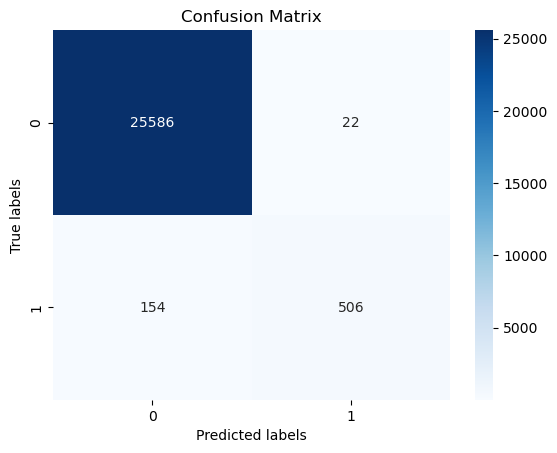

In [56]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create heatmap plot of confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

# Set plot labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show plot
plt.show()

### Plotting Feature Importance Graph

In [57]:
rf10.feature_importances_

array([9.74013136e-02, 7.13917764e-02, 5.05018631e-02, 4.90795452e-02,
       3.87803299e-02, 5.04713989e-02, 7.66775745e-02, 1.68039435e-01,
       1.23171030e-01, 6.40107807e-02, 1.22532139e-01, 6.56628399e-03,
       1.21115090e-02, 2.05736238e-02, 3.77997514e-03, 2.35056408e-03,
       2.11059290e-03, 3.64530068e-04, 8.22258352e-04, 1.91108135e-04,
       1.34183651e-04, 2.24462965e-04, 1.99132016e-04, 3.80866662e-04,
       6.17310909e-12, 5.00604431e-03, 4.87242025e-03, 3.25459844e-03,
       4.24979159e-03, 1.30807951e-03, 2.93977830e-03, 3.36214821e-03,
       5.60157605e-04, 3.86790310e-03, 4.33965899e-03, 1.83659270e-04,
       4.18948260e-03])

In [58]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': rf10.feature_importances_
     }
)

In [59]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [60]:
feat_imp_rf_df

,feature,feature_importance
0,mth_since_last_serv,1.680394e-01
1,annualised_mileage,1.231710e-01
2,num_serv_dealer_purchased,1.225321e-01
3,age_of_vehicle_years,9.740131e-02
4,total_services,7.667757e-02
5,sched_serv_warr,7.139178e-02
6,num_dealers_visited,6.401078e-02
7,non_sched_serv_warr,5.050186e-02
8,total_paid_services,5.047140e-02
9,sched_serv_paid,4.907955e-02


In [71]:
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)